In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('troop_movements.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())


First few rows of the DataFrame:
             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-05-20 16:23:05        1         tie_fighter               empire   
1  2024-05-20 16:23:04        2  resistance_soldier           resistance   
2  2024-05-20 16:23:03        3               at-st           resistance   
3  2024-05-20 16:23:02        4               at-st               empire   
4  2024-05-20 16:23:01        5               at-at           resistance   

   location_x  location_y  destination_x  destination_y homeworld  
0           7           9              2              3     Kalee  
1           1           5             10              5  Corellia  
2           7           8              6              7   Stewjon  
3           2           1              1              6  Dathomir  
4           5           2             10              8   Troiken  


In [5]:
data.groupby(['empire_or_resistance']).size()

empire_or_resistance
empire        498
resistance    502
dtype: int64

In [6]:
data.groupby(['unit_type']).size()

unit_type
at-at                 121
at-st                 116
resistance_soldier    118
stormtrooper          131
tie_fighter           121
tie_silencer          137
unknown               148
x-wing                108
dtype: int64

In [20]:
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'
data.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-05-20 16:23:05,1,tie_fighter,empire,7,9,2,3,Kalee,False
1,2024-05-20 16:23:04,2,resistance_soldier,resistance,1,5,10,5,Corellia,True
2,2024-05-20 16:23:03,3,at-st,resistance,7,8,6,7,Stewjon,True
3,2024-05-20 16:23:02,4,at-st,empire,2,1,1,6,Dathomir,False
4,2024-05-20 16:23:01,5,at-at,resistance,5,2,10,8,Troiken,True


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

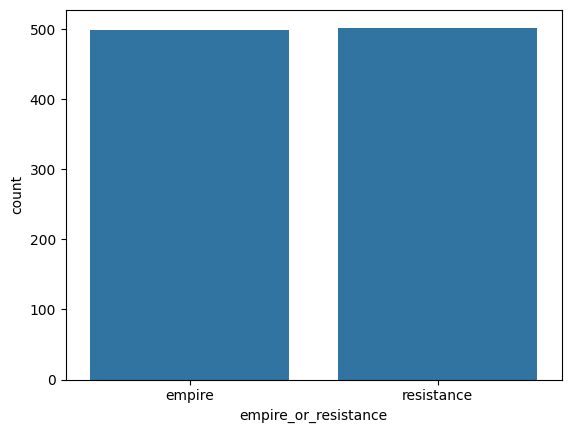

In [24]:
sns.countplot(data, x="empire_or_resistance")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
data.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-05-20 16:23:05,1,tie_fighter,empire,7,9,2,3,Kalee,False
1,2024-05-20 16:23:04,2,resistance_soldier,resistance,1,5,10,5,Corellia,True
2,2024-05-20 16:23:03,3,at-st,resistance,7,8,6,7,Stewjon,True
3,2024-05-20 16:23:02,4,at-st,empire,2,1,1,6,Dathomir,False
4,2024-05-20 16:23:01,5,at-at,resistance,5,2,10,8,Troiken,True


In [48]:
data_copy = data
data_copy = pd.get_dummies(data, columns=["homeworld", "unit_type"], dtype=int)
data_copy

,timestamp,unit_id,empire_or_resistance,location_x,location_y,destination_x,destination_y,is_resistance,homeworld_Alderaan,homeworld_Aleen Minor,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,2024-05-20 16:23:05,1,empire,7,9,2,3,False,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2024-05-20 16:23:04,2,resistance,1,5,10,5,True,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2024-05-20 16:23:03,3,resistance,7,8,6,7,True,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2024-05-20 16:23:02,4,empire,2,1,1,6,False,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2024-05-20 16:23:01,5,resistance,5,2,10,8,True,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-05-20 16:06:30,996,empire,2,10,1,10,False,0,0,...,0,0,0,0,0,0,0,1,0,0
996,2024-05-20 16:06:29,997,resistance,7,9,2,8,True,0,0,...,0,0,1,0,0,0,0,0,0,0
997,2024-05-20 16:06:28,998,empire,4,9,5,7,False,0,0,...,0,0,0,0,0,1,0,0,0,0
998,2024-05-20 16:06:27,999,empire,2,5,2,2,False,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
homeworlds = data_copy.loc[:, data_copy.columns.str.startswith('homeworld')]
homeworlds

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Sullust,homeworld_Tatooine,homeworld_Tholoth,homeworld_Toydaria,homeworld_Trandosha,homeworld_Troiken,homeworld_Tund,homeworld_Umbara,homeworld_Vulpter,homeworld_Zolan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
unit_type = data_copy.loc[:, data_copy.columns.str.startswith('unit_type')]
unit_type

,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0
996,1,0,0,0,0,0,0,0
997,0,0,0,1,0,0,0,0
998,0,0,0,1,0,0,0,0


In [73]:
unit_type.reset_index(drop=True, inplace=True)
homeworlds.reset_index(drop=True, inplace=True)

new_data = pd.concat([homeworlds, unit_type], axis=1)

new_data

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
X = new_data
y = data_copy['is_resistance']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(800, 50) (200, 50) (800,) (200,)


In [77]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [78]:
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.485


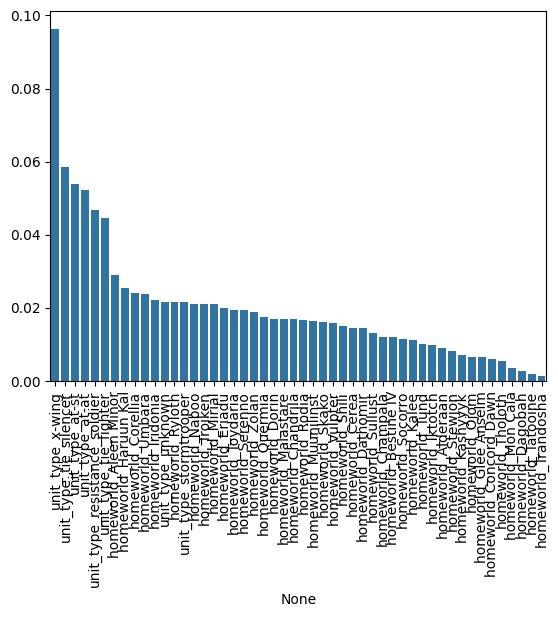

In [105]:
importances = model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': new_data.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index()
sns.barplot(feature_importances, x=new_data.columns, y=importances, order=feature_importances['Feature'])
plt.xticks(rotation = 90)

plt.show()

In [106]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(model, file)